# Netflix Data: Cleaning, Analysis & Visualization

## Project Overview
This project analyzes Netflix content data to understand trends in
movies and TV shows, including content distribution, genres, ratings,
and release patterns.

## Objective
- Clean and prepare Netflix dataset
- Analyze content trends and patterns
- Visualize key insights for decision-making


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [3]:
data = pd.read_csv("data/netflix_titles.csv")
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [5]:
data.shape

(8790, 10)

In [7]:
data.describe(include='all')

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
count,8790,8790,8790,8790,8790,8790,8790.000000,8790,8790,8790
unique,8790,2,8787,4528,86,1713,NaN,14,220,513
top,s1,Movie,9-Feb,Not Given,United States,1/1/2020,NaN,TV-MA,1 Season,"Dramas, International Movies"
freq,1,6126,2,2588,3240,110,NaN,3205,1791,362
mean,NaN,NaN,NaN,NaN,NaN,NaN,2014.183163,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.825466,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN


**Observation:**  
The dataset contains information about Netflix movies and TV shows,
including title, type, director, country, date added, release year,
rating, duration, and genre.

In [8]:
df = data.copy()

In [9]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

In [11]:
df.duplicated().sum()

0

**Observation:**  
Data had no Duplicate records or null values.


In [13]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [17]:
# listing the count of movies and TV shows
freq = df['type'].value_counts()

In [18]:
freq

type
Movie      6126
TV Show    2664
Name: count, dtype: int64

In [19]:
df['duration_numeric'] = df['duration'].str.extract('(\d+)').astype(float)

In [20]:
df


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_numeric
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,90.0
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1.0
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1.0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91.0
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125.0
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas",2.0
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV,3.0
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ...",1.0
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV,1.0


In [22]:
movies_df = df[df['type'] == 'Movie']
tvshows_df = df[df['type'] == 'TV Show']

**Insight:**  
Movies and TV shows were separated to enable accurate duration
and season-based analysis.


In [23]:
df['listed_in'] = df['listed_in'].str.split(',')

In [24]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_numeric
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,[Documentaries],90.0
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",1.0
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",1.0
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"[Children & Family Movies, Comedies]",91.0
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"[Dramas, Independent Movies, International M...",125.0
...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"[International TV Shows, TV Dramas]",2.0
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,[Kids' TV],3.0
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"[International TV Shows, Romantic TV Shows, ...",1.0
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,[Kids' TV],1.0


In [25]:
df.to_csv("data/netflix_cleaned.csv", index = False)

## 3. Exploratory Data Analysis (EDA)


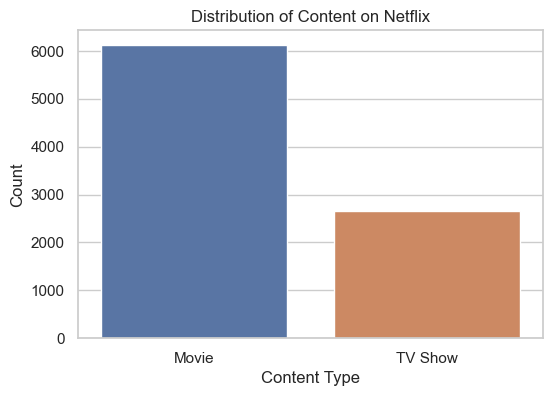

In [32]:
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df)
plt.title("Distribution of Content on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


**Insight:**  
Movies constitute a larger portion of Netflix content compared to
TV Shows, indicating Netflix’s strong focus on movie offerings.

In [36]:
df['date_added'] = pd.to_datetime(df['date_added'])
df['year_added'] = df['date_added'].dt.year

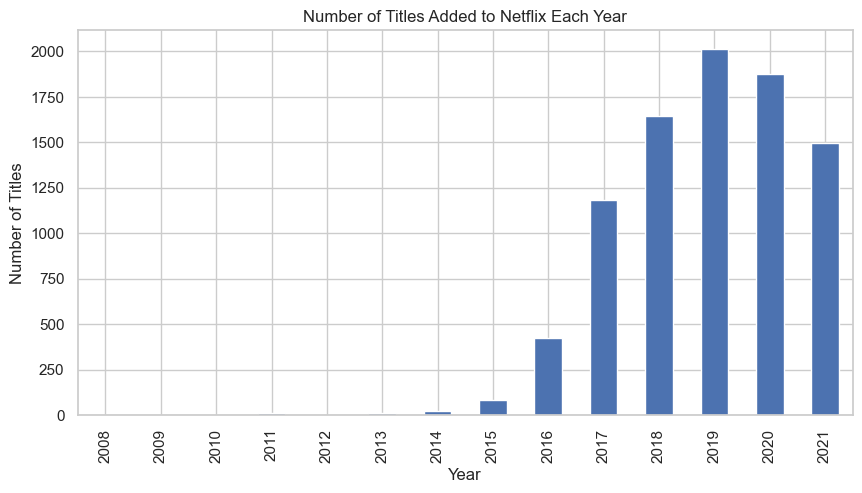

In [37]:
plt.figure(figsize=(10,5))
df['year_added'].value_counts().sort_index().plot(kind='bar')
plt.title("Number of Titles Added to Netflix Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.show()


**Insight:**  
Netflix experienced rapid content expansion in recent years,
highlighting aggressive growth in its content library.


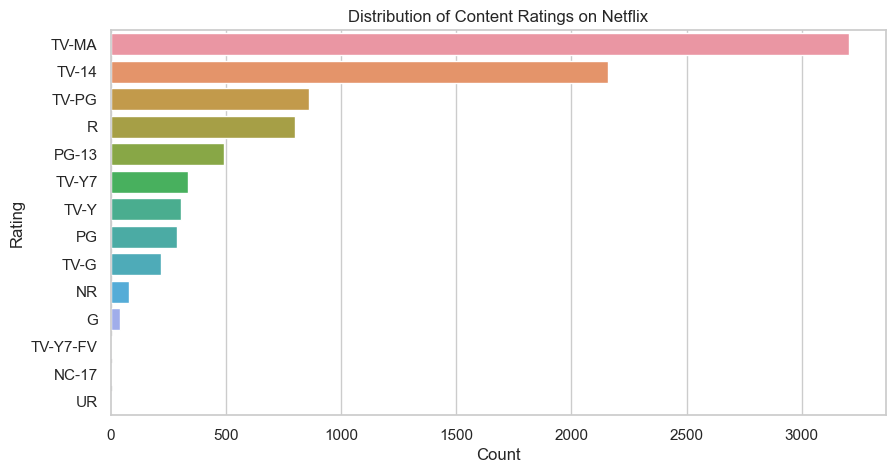

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(
    y='rating',
    data=df,
    order=df['rating'].value_counts().index
)
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()


**Insight:**  
The majority of Netflix content is rated for mature audiences,
suggesting a strong focus on adult-oriented programming.


In [48]:
country_df = df.copy()
country_df['country'] = country_df['country'].str.split(', ')
country_df = country_df.explode('country')
country_df = country_df[~country_df['country'].isin(['Not Given'])]

In [49]:
country_df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_numeric,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],90.0,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",1.0,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",1.0,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"[Children & Family Movies, Comedies]",91.0,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"[Dramas, Independent Movies, International M...",125.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"[International TV Shows, TV Dramas]",2.0,2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,[Kids' TV],3.0,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"[International TV Shows, Romantic TV Shows, ...",1.0,2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,[Kids' TV],1.0,2018


In [41]:
df

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,duration_numeric,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,2021-09-25,2020,PG-13,90 min,[Documentaries],90.0,2021
1,s3,TV Show,Ganglands,Julien Leclercq,France,2021-09-24,2021,TV-MA,1 Season,"[Crime TV Shows, International TV Shows, TV ...",1.0,2021
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,2021-09-24,2021,TV-MA,1 Season,"[TV Dramas, TV Horror, TV Mysteries]",1.0,2021
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,2021-09-22,2021,TV-PG,91 min,"[Children & Family Movies, Comedies]",91.0,2021
4,s8,Movie,Sankofa,Haile Gerima,United States,2021-09-24,1993,TV-MA,125 min,"[Dramas, Independent Movies, International M...",125.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,2017-01-17,2016,TV-PG,2 Seasons,"[International TV Shows, TV Dramas]",2.0,2017
8786,s8798,TV Show,Zak Storm,Not Given,United States,2018-09-13,2016,TV-Y7,3 Seasons,[Kids' TV],3.0,2018
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,2016-12-15,2012,TV-PG,1 Season,"[International TV Shows, Romantic TV Shows, ...",1.0,2016
8788,s8784,TV Show,Yoko,Not Given,Pakistan,2018-06-23,2016,TV-Y,1 Season,[Kids' TV],1.0,2018


In [50]:
count = country_df['country'].value_counts()

In [51]:
count

country
United States     3240
India             1057
United Kingdom     638
Pakistan           421
Canada             271
                  ... 
Iran                 1
West Germany         1
Greece               1
Zimbabwe             1
Soviet Union         1
Name: count, Length: 85, dtype: int64

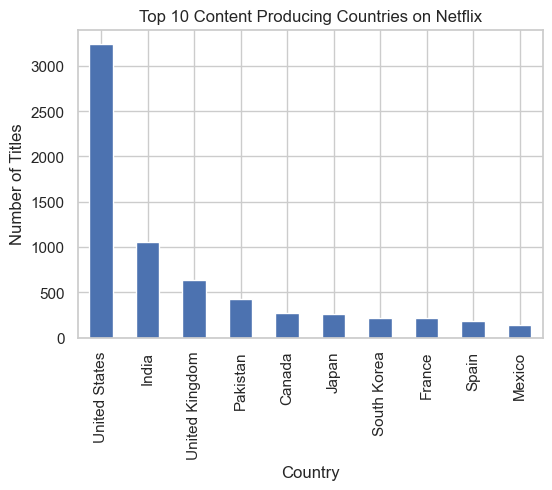

In [52]:
plt.figure(figsize=(6,4))
count.head(10).plot(kind = 'bar')
plt.title("Top 10 Content Producing Countries on Netflix")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.show()